# Inverted pendulum

## 1. Modelling and Linearization

### Equations of motion

The equations covering the motion of an inverted pendulum on a cart are the following:

$x_1 = x\text{: horizontal position (m)}$

$x_2 = \dot{x}\text{: horizontal velocity (m/s)}$

$x_3 = \theta\text{: angle of rod (rad)}$

$x_4 = \dot{\theta}\text{: angular velocity of the rod (rad/s)}$

We want to stabilise the system at $x_{3}^{eq} = 0$, where $x_{4}^{eq}$ and $F^{eq} = 0$

### The dynamical system

The dynamical system is described as

$\dot{x_1} = x_2,$

$\dot{x_2} = \Phi(F,x_3,x_4),$

$\dot{x_3} = x_4,$

$\dot{x_4} = \Psi(F,x_3,x_4).$

where

$\Phi(F,x_3,x_4) := \frac{4m \cdot l \cdot x_4^2 \cdot \sin(x_3) + 4F - 3m \cdot g \cdot \sin(x_3) \cos(x_3)}{4(M+m)-3m \cdot \cos^2(x^3)},$

$\Psi(F,x_3,x_4) := -3\frac{m \cdot l \cdot x_4^2 \cdot \sin(x_3)}{[4(M+m)-3m \cdot \cos^2(x_3)]l}.$

Here, $M$ and $m$ are the masses of the cart and rod respectively, $l$ is the half-length of the rod and $g$ is the gravitational acceleration.

In [2]:
import sympy as sym
import matplotlib
from sympy.physics.control.lti import TransferFunction as TF
from sympy.physics.control import *

x_3, x_4, F = sym.symbols('x_3, x_4, F', real = True)
M, m, l, g = sym.symbols('M, m, l, g', positive = True)

phi = (4*m*l*x_4**2*sym.sin(x_3) + 4*F - 3*m*g*sym.sin(x_3)*sym.cos(x_3))/(4 * (M + m) - 3 * m * sym.cos(x_3)**2)
print("Phi = ")
sym.pprint(phi)

psi = -3 * (m * l * x_4**2 * sym.sin(x_3) * sym.cos(x_3) + F * sym.cos(x_3) - (M + m) * g * sym.sin(x_3))/((4 * (M + m) - 3 * m * sym.cos(x_3)**2) * l)
print("Psi = ")
sym.pprint(psi)


Phi = 
                                      2        
4⋅F - 3⋅g⋅m⋅sin(x₃)⋅cos(x₃) + 4⋅l⋅m⋅x₄ ⋅sin(x₃)
───────────────────────────────────────────────
                        2                      
           4⋅M - 3⋅m⋅cos (x₃) + 4⋅m            
Psi = 
                                             2                
-3⋅F⋅cos(x₃) + 3⋅g⋅(M + m)⋅sin(x₃) - 3⋅l⋅m⋅x₄ ⋅sin(x₃)⋅cos(x₃)
──────────────────────────────────────────────────────────────
                   ⎛             2          ⎞                 
                 l⋅⎝4⋅M - 3⋅m⋅cos (x₃) + 4⋅m⎠                 


### Linearization

We need to linearize both $\Phi$ and $\Psi$.

#### Linearizing $\Phi$

We will start with $\Phi$ at $(F, x_3, x_4) = (0,0,0)$, i.e. no force acting on the cart, rod in the upright position with no angular velocity. The linearization will have the format:

$\Psi(F, x_3, x_4) \approx a \cdot F + b \cdot x_3 + c \cdot x_4$

In [3]:
F_0 = 0
x_3_0 = 0
x_4_0 = 0

phi_0 = phi.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])
sym.pprint(phi_0)

0


We find that $\Phi(0,0,0) = 0$.
We will now determine the partial derivatives

$\frac{\partial\Phi}{\partial F}, \frac{\partial\Phi}{\partial x_3}, \frac{\partial\Phi}{\partial x_4}$

In [4]:
dphi_f = phi.diff(F)
dphi_x3 = phi.diff(x_3)
dphi_x4 = phi.diff(x_4)

# these are ugly and long, so we will not print them, but you can if you want to:
#
# print("Partial derivative of Phi in regards to F:")
# sym.pprint(dphi_f)
# print()
# print("Partial derivative of Phi in regards to x_3:")
# sym.pprint(dphi_x3)
# print()
# print("Partial derivative of Phi in regards to x_4:")
# sym.pprint(dphi_x4)

Now we will determine the values for

$ \left. \frac{\partial\Phi}{\partial F} \right |_{0,0,0}, \left. \frac{\partial\Phi}{\partial x_3} \right |_{0,0,0}, \left. \frac{\partial\Phi}{\partial x_4} \right |_{0,0,0} $

In [5]:
dphi_f_0 = dphi_f.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])
dphi_x3_0 = dphi_x3.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])
dphi_x4_0 = dphi_x4.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])

sym.pprint(dphi_f_0)
print()
sym.pprint(dphi_x3_0)
print()
sym.pprint(dphi_x4_0)

   4   
───────
4⋅M + m

-3⋅g⋅m 
───────
4⋅M + m

0


We find that

$ \left. \frac{\partial \Phi(F, x_3, x_4) }{\partial F} \right |_{0,0,0} = \frac{4}{4M + m}, $

$ \left. \frac{\partial \Phi(F, x_3, x_4) }{\partial x_3} \right |_{0,0,0} = -\frac{3g \cdot m}{4M + m}, $

$ \left. \frac{\partial \Phi(F, x_3, x_4) }{\partial x_4} \right |_{0,0,0} = 0.$

Therefore the linearization of $\Phi$ at $(0,0,0)$ is:

$ \Phi \approx  \frac{4}{4M + m} \cdot F - \frac{3g \cdot m}{4M + m} \cdot x_3 $

This is considered valid for $(F, x_3, x_4)$ close to $(0,0,0)$

#### Linearizing $\Psi$

We will now linearize $\Psi$ at $(F, x_3, x_4) = (0,0,0)$. The linearization will have the format:

$\Psi(F, x_3, x_4) \approx c \cdot F + d \cdot x_3 + e\cdot x_4$

where $c_1$, $c_2$, $c_3$ are constants to be determined.

In [6]:
psi_0 = psi.subs([(F,F_0), (x_3, x_3_0), (x_4, x_4_0)])
sym.pprint(psi_0)

0


We find that $\Psi(0,0,0) = 0$.
We will now determine the partial derivatives

$\frac{\partial\Psi}{\partial F}, \frac{\partial\Psi}{\partial x_3}, \frac{\partial\Psi}{\partial x_4}$

In [7]:
dpsi_f = psi.diff(F)
dpsi_x3 = psi.diff(x_3)
dpsi_x4 = psi.diff(x_4)

# these are again ugly and long, so we will not print them, but you can if you want to:
#
# print("Partial derivative of Psi in regards to F:")
# sym.pprint(dpsi_f)
# print()
# print("Partial derivative of Psi in regards to x_3:")
# sym.pprint(dpsi_x3)
# print()
# print("Partial derivative of Psi in regards to x_4:")
# sym.pprint(dpsi_x4)

Now we will determine the values for

$ \left. \frac{\partial\Psi}{\partial F} \right |_{0,0,0}, \left. \frac{\partial\Psi}{\partial x_3} \right |_{0,0,0}, \left. \frac{\partial\Psi}{\partial x_4} \right |_{0,0,0} $

In [8]:
dpsi_f_0 = dpsi_f.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])
dpsi_x3_0 = dpsi_x3.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])
dpsi_x4_0 = dpsi_x4.subs([(F, F_0), (x_3, x_3_0), (x_4, x_4_0)])

sym.pprint(dpsi_f_0)
print()
sym.pprint(dpsi_x3_0)
print()
sym.pprint(dpsi_x4_0)

    -3     
───────────
l⋅(4⋅M + m)

3⋅g⋅(M + m)
───────────
l⋅(4⋅M + m)

0


We find that

$ \left. \frac{\partial \Psi(F, x_3, x_4) }{\partial F} \right |_{0,0,0} = -\frac{3}{l (4M + m)}, $

$ \left. \frac{\partial \Psi(F, x_3, x_4) }{\partial x_3} \right |_{0,0,0} = \frac{3(M+m)g}{l (4M + m)}, $

$ \left. \frac{\partial \Psi(F, x_3, x_4) }{\partial x_4} \right |_{0,0,0} = 0.$

Therefore the linearization of $\Psi$ at $(0,0,0)$ is:

$ \Psi \approx  -\frac{3}{l (4M + m)} \cdot F + \frac{3(M+m)g}{l (4M + m)} \cdot x_3 $

This is considered valid for $(F, x_3, x_4)$ close to $(0,0,0)$

### Transfer function of the linearized system

To determine the transfer function of the system

$ \dot{x_1} = x_2,$

$ \dot{x_2} = a F - b x_3 $

where $ a = \frac{4}{4M + m},\: b = \frac{3g \cdot m}{4M + m}. $ 

we will perform the laplace transform on both sides of both equations.

$ \dot{x_1} = x_2 \xrightarrow{\mathcal{L}} sX_1 = X_2 $

$ \dot{x_2} = a F - b x_3 \xrightarrow{\mathcal{L}} sX_2 = aF - bX_3 $

The resulting transfer function is now

$ G_x(s) = \frac{as^2+\frac{bc}{1-d}}{s^4} $

In [9]:
a, b, c, d, t = sym.symbols('a, b, c, d, t', positive = True)
s = sym.symbols('s')
G_x = (a*s**2+(b*c)/(1-d))/(s**4)



We will now determine the transfer function of the system

$ \dot{x_3} = x_4,$

$ \dot{x_4} = dx_3 - cF. $

where $ c = \frac{3}{l (4M + m)},\: d = \frac{3(M+m)g}{l (4M + m)}. $ 

To do this, we again transform both sides of both system equations as follows:

$ \dot{x_3} = x_4 \xrightarrow{\mathcal{L}} sX_3 = X_4,$

$ \dot{x_4} = dx_3 - cF \xrightarrow{\mathcal{L}} sX_4 = dX_3 - cF. $

Substituting $X_4$ gives us

$ G_\theta(s) = \frac{X_3}{F} = \frac{-c}{s^2-d}. $ 

The transfer function $G_\theta(s)$ has poles at $ s = \pm d. $

In [10]:
G_theta = -c/(s**2-d)

## 2. System dynamics
### Impulse response

We can calculate the impulse response of a system by multiplying the respective transfer function with 1 in the s-domain, as this is the laplace transform of a dirac pulse.

#### $G_\theta(s)$: The pole angle

We will look at the pendulum angle first.

-c⋅sinh(√d⋅t) 
──────────────
      √d      


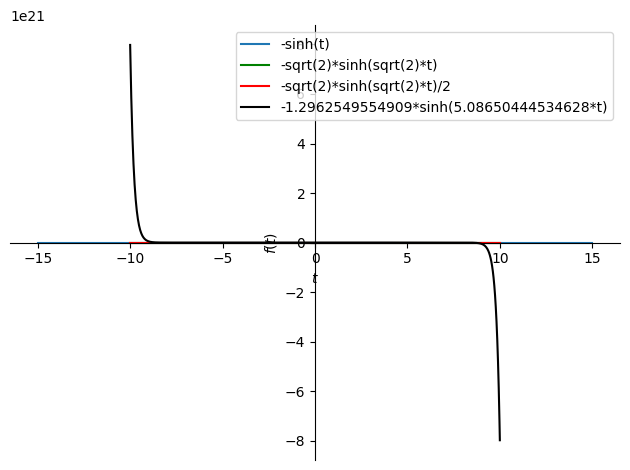

In [11]:
F = 1
X_3 = G_theta * F
x_3 = sym.inverse_laplace_transform(X_3, s, t)
sym.pprint(x_3)

# TODO fix?
x_3plot = x_3.subs([(c, 1), (d, 1)])
p = sym.plot(x_3plot, (t,-15,15), legend = True, show = False)
x_3plot2 = x_3.subs([(c, 2), (d, 2)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='g', show = False))
x_3plot2 = x_3.subs([(c, 1), (d, 2)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='r', show = False))
x_3plot2 = x_3.subs([(c, 6.593406593406594), (d, 25.87252747252748)])       # these values are obtained from values in invp_pid_control.ipynb
p.extend(sym.plot(x_3plot2, legend = True, line_color='k', show = False))
p.show()

### Step response

Likewise, we can calculate the step response of the system by multiplying the transfer function by $\frac{1}{s}$.

   ⎛cosh(√d⋅t)   1⎞
-c⋅⎜────────── - ─⎟
   ⎝    d        d⎠


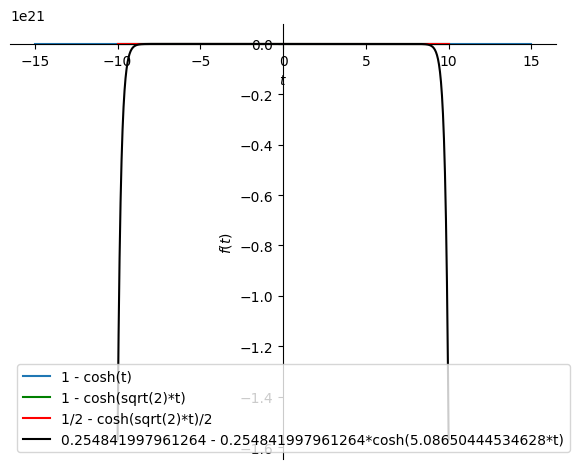

In [12]:
F = 1/s
X_3 = G_theta * F
x_3 = sym.inverse_laplace_transform(X_3, s, t)
sym.pprint(x_3)

# TODO fix?
x_3plot = x_3.subs([(c, 1), (d, 1)])
p = sym.plot(x_3plot, (t,-15,15), legend = True, show = False)
x_3plot2 = x_3.subs([(c, 2), (d, 2)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='g', show = False))
x_3plot2 = x_3.subs([(c, 1), (d, 2)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='r', show = False))
x_3plot2 = x_3.subs([(c, 6.593406593406594), (d, 25.87252747252748)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='k', show = False))
p.show()

### Frequency response

We will now look at the response of our linearized system to an input in the form of $F(t) = sin(\omega t),$ where $\omega > 0$.

   ⎛  t   sinh(√d⋅t)⎞ 
-c⋅⎜- ─ + ──────────⎟ 
   ⎜  d       3/2   ⎟ 
   ⎝         d      ⎠ 
──────────────────────
          ω           


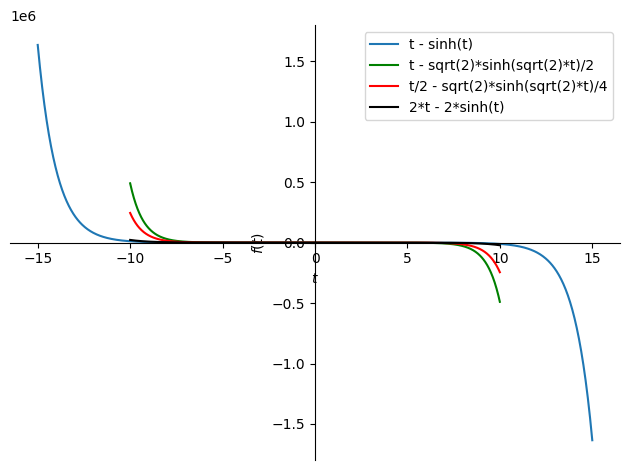

In [13]:
omega = sym.symbols('omega', positive = True)
F = omega/(s**2 * omega**2)
X_3 = G_theta * F
x_3 = sym.inverse_laplace_transform(X_3, s, t)
sym.pprint(x_3)

# TODO fix?
x_3plot = x_3.subs([(c, 1), (d, 1), (omega, 1)])
p = sym.plot(x_3plot, (t,-15,15), legend = True, show = False)
x_3plot2 = x_3.subs([(c, 2), (d, 2), (omega, 1)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='g', show = False))
x_3plot2 = x_3.subs([(c, 1), (d, 2), (omega, 1)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='r', show = False))
x_3plot2 = x_3.subs([(c, 2), (d, 1), (omega, 1)])
p.extend(sym.plot(x_3plot2, legend = True, line_color='k', show = False))
p.show()